In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.linalg import solve_banded
from scipy import sparse
import seaborn as sns

#y[0] = 0.1*x**4 - 0.4*x**3 
l = 2
y[0] = l*(x**4)/4 + l*x**3 - 9*l*x*x/2
y[0] = 0*np.sin(4*np.pi*x)
al = eta*dt/(h*h*h*h)
b = y[0].copy()
for t in range(1, m):

    A[0, 0] = 1
    A[1, 0] = -3/2
    A[1, 1] = 2
    A[1, 2] = -1/2
    #A[1, 3] = al
    A[-2, -1] = 2
    A[-2, -2] = -5
    A[-2, -3] = 4
    A[-2, -4] = -1
    
    A[-1, -1] = 5/2
    A[-1, -2] = -9
    A[-1, -3] = 12
    A[-1, -4] = -7
    A[-1, -5] = 3/2
    for i in range(2, n-2):
        A[i, i] = 6*al + 1
        A[i, i-1] = -4*al
        A[i, i+1] = -4*al
        A[i, i-2] = al
        A[i, i+2] = al
    b = (y[t-1]).copy()
    b[0] = 0.5*np.sin(4*dt*t)
    b[1] = 0
    b[-1] = 0
    b[-2] = 0
    #ab = diagonal_form(A, 2, 4)
    y[t] = np.linalg.solve(A, b) # 50 seconds
    #y[t] = solve_banded((4,2), ab, b)

sol1 = y.copy()
np.abs(y).max()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-np.abs(y).max(), np.abs(y).max())
ax.grid()
line, = ax.plot(x, y[0])
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, y[100*fn])
    point.set_label(f'Time: {100*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

In [2]:
T = 10

n = 200 # Number of points
m = 10000 # Timesteps
y = np.zeros((m, n), dtype=np.cdouble) # Solution array

A = np.zeros((n, n)) # A-matrix
b = np.zeros(n, dtype=np.cdouble) # b-vector

R = np.exp(2-4*np.pi)
G = 1
Q = 1
S = 1
K = 1
mu = 1
f = 4
l1 = Q*S*K*K
l2 =(2-np.log(R))/(4*np.pi*mu)
l0 = (l1*l2/(f))**(1/4)

def analytical_y(G, l0, L, x, t):
    c8 = np.cos(np.pi/8) # 0.92
    s8 = np.sin(np.pi/8) # 0.38
    theta = x*(c8 - 1j*s8)/l0
    phi = L*(c8 - 1j*s8)/l0
    p1 = G*l0*(np.exp(1j*(f*t + np.pi/8)))
    p2 = 1/(2 + 2*np.cosh(phi)*np.cos(phi))
    p3 = np.sin(theta) + np.sinh(theta) + np.sin(phi)*np.cosh(phi-theta) - np.cos(phi)*np.sinh(phi-theta) - np.cosh(phi)*np.sin(phi-theta) + np.sinh(phi)*np.cos(phi-theta)
    return p1*p2*p3

eta = l1*l2
L = 10*l0
x = np.linspace(0, L, n) # Grid
times = np.linspace(0, T, m)
h = L/(n-1) # Grid spacing
dt = T/(m-1)
s = eta*dt/(h**4)
l0, eta

(0.7071067811865476, 1.0)

In [3]:
#y[0] = 0.1*x**4 - 0.4*x**3 
#l = 2
#y[0] = l*(x**4)/4 + l*x**3 - 9*l*x*x/2
#y[0] = 0*x
y[0] = 0*x
al = eta*dt/(h*h*h*h)
b = y[0].copy()
for t in range(1, m):
    Ab = np.zeros((7, n))
    Ab[0, 4:] = al
    Ab[1, 3:-1] = -4*al
    Ab[2, 2:-2] = 6*al + 1
    Ab[3, 1:-3] = -4*al
    Ab[4, :-4] = al
    
    Ab[2, 0] = 1
    
    Ab[3, 0] = -(11/6)/h
    Ab[2, 1] = +(3)/(h)
    Ab[1, 2] = -(9/6)/(h)
    Ab[0, 3] = +(1/3)/(h)

    Ab[1, -1] = 2/(h*h)
    Ab[2, -2] = -5/(h*h)
    Ab[3, -3] = 4/(h*h)
    Ab[4, -4] = -1/(h*h)

    Ab[2, -1] = 5/2
    Ab[3, -2] = -9
    Ab[4, -3] = 12
    Ab[5, -4] = -7
    Ab[6, -5] = 3/2
    b = (y[t-1]).copy()
    b[0] = 0
    b[1] = G*np.exp(1j*f*dt*t)

    b[-1] = 0
    b[-2] = 0
    y[t] = solve_banded((4,2), Ab, b)

0.3930168697409018


/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


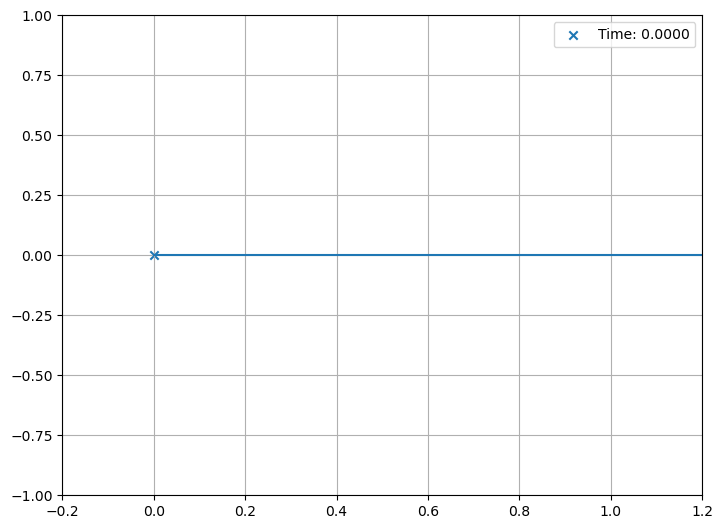

In [4]:
sol2 = y.copy()
print(np.abs(y).max())
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, 1)
ax.grid()
line, = ax.plot(x, y[0])
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, y[100*fn])
    point.set_label(f'Time: {100*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

In [5]:
y2 = np.zeros((m, n), dtype=np.cdouble) # Solution array
x = np.linspace(0, L, n) # Grid
for t in range(0, m):
    y2[t] = analytical_y(G=G, l0=l0, L=L, x=x, t=dt*t)

0.35609218652430874


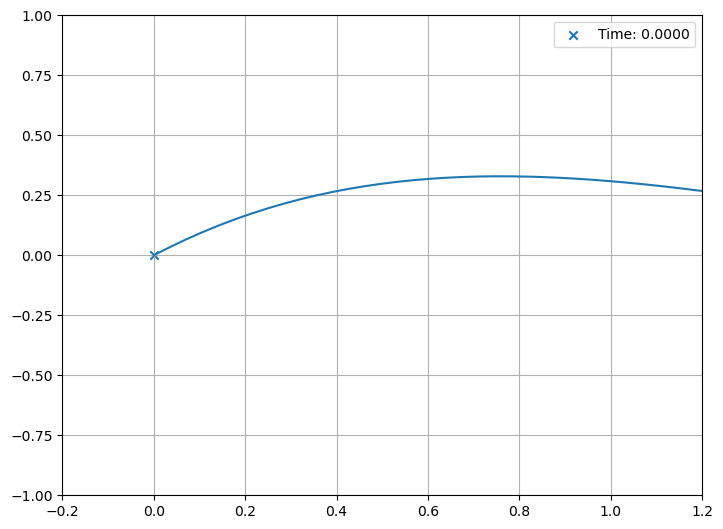

In [6]:
y = np.real(y2)
sol = y.copy()
print(np.abs(y).max())
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, 1)
ax.grid()
line, = ax.plot(x, y[0])
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, y[100*fn])
    point.set_label(f'Time: {100*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


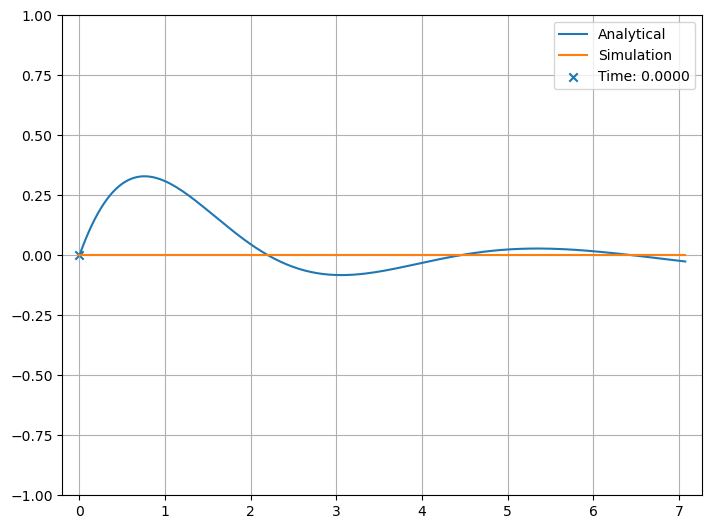

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, L+0.2)
ax.set_ylim(-1, 1)
ax.grid()
line, = ax.plot(x, sol[0], label='Analytical')
line2, = ax.plot(x, sol2[0], label='Simulation')
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, sol[100*fn])
    line2.set_data(x, sol2[100*fn])
    point.set_label(f'Time: {100*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

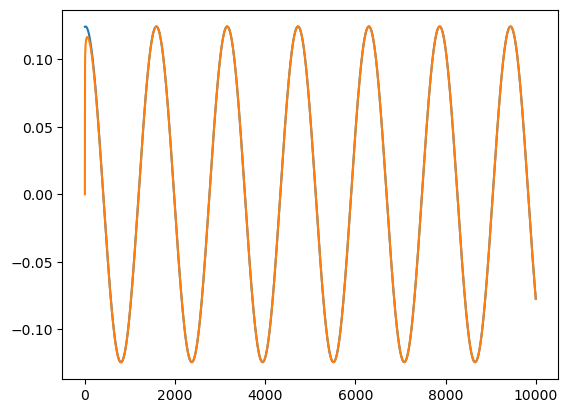

In [8]:
plt.plot(sol[:20000, 4])
plt.plot(sol2[:20000, 4])

In [61]:
p = 12
ns = [2**x for x in range(4, p)]
l2_errors = np.zeros(p-4)
for k, n in enumerate(ns):
    T = 10
    m = 100000 # Timesteps
    
    y = np.zeros((m, n), dtype=np.cdouble) # Solution array
    b = np.zeros(n, dtype=np.cdouble) # b-vector

    R = np.exp(2-4*np.pi)
    G = 1
    Q = 1
    S = 1
    K = 1
    mu = 1
    f = 4
    l1 = Q*S*K*K
    l2 =(2-np.log(R))/(4*np.pi*mu)
    l0 = (l1*l2/(f))**(1/4)
    eta = l1*l2
    L = 10*l0
    x = np.linspace(0, L, n) # Grid
    times = np.linspace(0, T, m)
    h = L/(n-1) # Grid spacing
    dt = T/(m-1)
    s = eta*dt/(h**4)
    y[0] = 0*x
    al = eta*dt/(h*h*h*h)
    b = y[0].copy()
    for t in range(1, m):
        Ab = np.zeros((7, n))
        Ab[0, 4:] = al
        Ab[1, 3:-1] = -4*al
        Ab[2, 2:-2] = 6*al + 1
        Ab[3, 1:-3] = -4*al
        Ab[4, :-4] = al

        Ab[2, 0] = 1

        Ab[3, 0] = -(1.5)/h
        Ab[2, 1] = +(2)/(h)
        Ab[1, 2] = -(0.5)/(h)
        #Ab[0, 3] = +(1/3)/(h)

        Ab[1, -1] = 2/(h*h)
        Ab[2, -2] = -5/(h*h)
        Ab[3, -3] = 4/(h*h)
        Ab[4, -4] = -1/(h*h)

        Ab[2, -1] = 5/2
        Ab[3, -2] = -9
        Ab[4, -3] = 12
        Ab[5, -4] = -7
        Ab[6, -5] = 3/2
        b = (y[t-1]).copy()
        b[0] = 0
        b[1] = G*np.exp(1j*f*dt*t)

        b[-1] = 0
        b[-2] = 0
        y[t] = solve_banded((4,2), Ab, b)
    
    dom = np.linspace(0, L, 200000)
    y_full = np.interp(dom, x, y[-1])
    analytical = analytical_y(G, l0, L, dom, t*dt)
    l2_errors[k] = np.abs(np.real(y_full) - np.real(analytical)).sum()

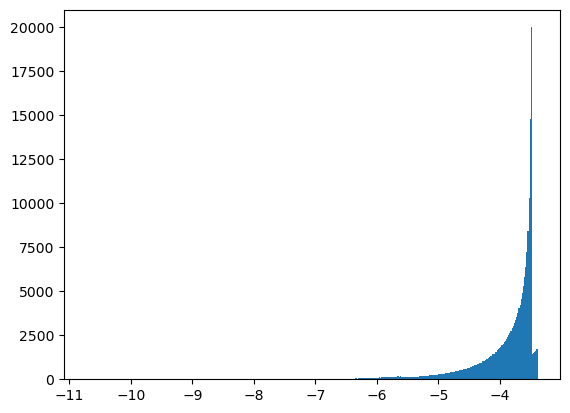

In [62]:
plt.hist(np.log10(np.abs(np.real(y_full) - np.real(analytical))), bins=400)
plt.show()

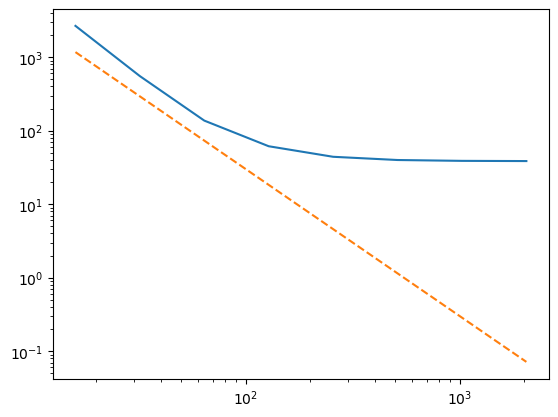

In [63]:
plt.loglog(ns, l2_errors)
plt.loglog(ns, 300000*1/np.power(ns, 2), linestyle='--', label='$n_p^{-2}$')
plt.savefig('./test_2.png')

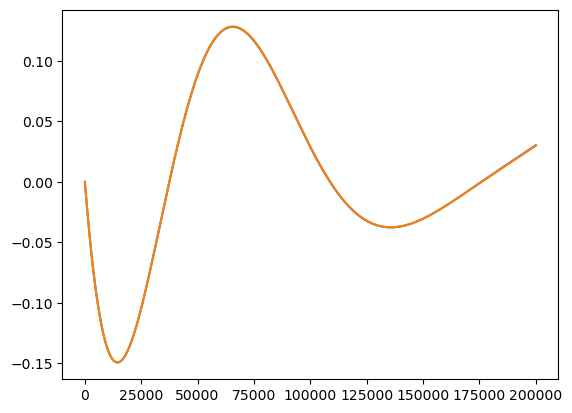

In [47]:
plt.plot(np.real(y_full))
plt.plot(np.real(analytical))

In [12]:
p = 16
ms = [2**x for x in range(4, p)]
l2_errors = np.zeros(p-4)
for k, m in enumerate(ms):
    T = 10
    
    n = 2000
    
    y = np.zeros((m, n), dtype=np.cdouble) # Solution array
    b = np.zeros(n, dtype=np.cdouble) # b-vector

    R = np.exp(2-4*np.pi)
    G = 1
    Q = 1
    S = 1
    K = 1
    mu = 1
    f = 4
    l1 = Q*S*K*K
    l2 =(2-np.log(R))/(4*np.pi*mu)
    l0 = (l1*l2/(f))**(1/4)
    eta = l1*l2
    L = 10*l0
    x = np.linspace(0, L, n) # Grid
    times = np.linspace(0, T, m)
    h = L/(n-1) # Grid spacing
    dt = T/(m-1)
    s = eta*dt/(h**4)
    y[0] = 0*x
    al = eta*dt/(h*h*h*h)
    b = y[0].copy()
    for t in range(1, m):
        Ab = np.zeros((7, n))
        Ab[0, 4:] = al
        Ab[1, 3:-1] = -4*al
        Ab[2, 2:-2] = 6*al + 1
        Ab[3, 1:-3] = -4*al
        Ab[4, :-4] = al

        Ab[2, 0] = 1

        Ab[3, 0] = -(11/6)/h
        Ab[2, 1] = +(3)/(h)
        Ab[1, 2] = -(9/6)/(h)
        Ab[0, 3] = +(1/3)/(h)

        Ab[1, -1] = 2/(h*h)
        Ab[2, -2] = -5/(h*h)
        Ab[3, -3] = 4/(h*h)
        Ab[4, -4] = -1/(h*h)

        Ab[2, -1] = 5/2
        Ab[3, -2] = -9
        Ab[4, -3] = 12
        Ab[5, -4] = -7
        Ab[6, -5] = 3/2
        b = (y[t-1]).copy()
        b[0] = 0
        b[1] = G*np.exp(1j*f*dt*t)

        b[-1] = 0
        b[-2] = 0
        y[t] = solve_banded((4,2), Ab, b)
    
    dom = np.linspace(0, L, 2000)
    y_full = np.interp(dom, x, y[-1])
    analytical = analytical_y(G, l0, L, dom, t*dt)
    l2_errors[k] = np.abs(np.real(y_full) - np.real(analytical)).sum()

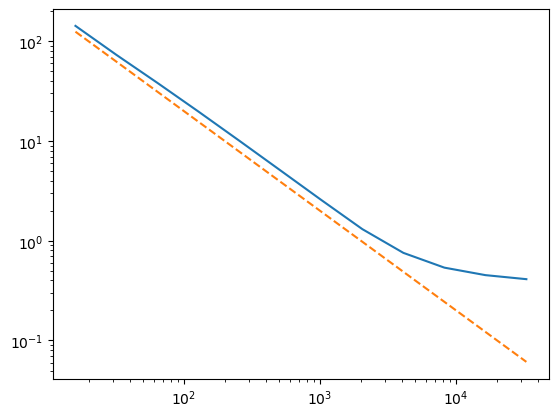

In [19]:
plt.loglog(ms, l2_errors)
plt.loglog(ms, 2000*1/np.power(ms, 1), linestyle='--', label='$n_p^{-2}$')